Exploratory Data Analysis (EDA) on the Movies Data

Performing EDA will will help give insight to the data, an understanding of the data types, and allow us to determine what features are important and the relationships between them.  We can also test any underlying assumptions during the exploratory phase.

In [1]:
# Import the neccessary 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#Load the data in to a dataframe and review the data
movies_df = pd.read_csv('./Resources/movies.csv', encoding = "ISO-8859-1")
movies_df.head()

#Data source: https://www.kaggle.com/datasets/danielgrijalvas/movies?select=movies.csv
#Contains movies from 1980 to early 2020

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
movies_df.describe(include='all')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
count,7668,7591,7668,7668.000000,7666,7665.000000,7.665000e+03,7668,7665,7667,7665,5.497000e+03,7.479000e+03,7651,7664.000000
unique,7512,12,19,NaN,3414,NaN,NaN,2949,4535,2814,59,NaN,NaN,2385,NaN
top,Hamlet,R,Comedy,NaN,"May 17, 2019 (United States)",NaN,NaN,Woody Allen,Woody Allen,Nicolas Cage,United States,NaN,NaN,Universal Pictures,NaN
freq,3,3697,2245,NaN,9,NaN,NaN,38,37,43,5475,NaN,NaN,377,NaN
mean,NaN,NaN,NaN,2000.405451,NaN,6.390411,8.810850e+04,NaN,NaN,NaN,NaN,3.558988e+07,7.850054e+07,NaN,107.261613
std,NaN,NaN,NaN,11.153508,NaN,0.968842,1.633238e+05,NaN,NaN,NaN,NaN,4.145730e+07,1.657251e+08,NaN,18.581247
min,NaN,NaN,NaN,1980.000000,NaN,1.900000,7.000000e+00,NaN,NaN,NaN,NaN,3.000000e+03,3.090000e+02,NaN,55.000000
25%,NaN,NaN,NaN,1991.000000,NaN,5.800000,9.100000e+03,NaN,NaN,NaN,NaN,1.000000e+07,4.532056e+06,NaN,95.000000
50%,NaN,NaN,NaN,2000.000000,NaN,6.500000,3.300000e+04,NaN,NaN,NaN,NaN,2.050000e+07,2.020576e+07,NaN,104.000000
75%,NaN,NaN,NaN,2010.000000,NaN,7.100000,9.300000e+04,NaN,NaN,NaN,NaN,4.500000e+07,7.601669e+07,NaN,116.000000


In [4]:
# Shows the numbers of rows and columns

movies_df.shape

(7668, 15)

In [5]:
#Check to see if the dtypes line up to  ake sure the fields with numbers are a numeric data type and text fields are objects 

movies_df.info()

# there are null values in some of these fields and we will need to address them by deciding to drop, fill or ignore them
# Key fields such are the gross, budget, actor/actress, and director will need to get dropped or filled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
# Check for the number of Nulls/Nans
movies_df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

<AxesSubplot:>

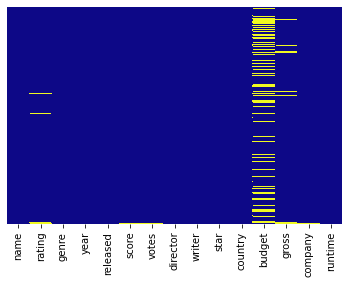

In [7]:
# Visualizing Missing Values
sn.heatmap(movies_df.isnull(), cbar=False, yticklabels=False, cmap='plasma')

#Budgets has numerous missing budgets


At this point we can see that there are 7668 Movies and 15 columns in our dataset
The data types consist of float64(5), int64(1), and objects object(9)
There are a large number of null values in budget and gross fields
This is important because we are expecting the budget field to be a significant influencer of the Gross Revenue


###### How do we want to handle nulls in our budget and gross colums? Drop them? Fill them in from other data sources?  Fill budget in with a mean? 

In [8]:
# Another item to look for in key numeric fields is 0 values

print(movies_df.budget[movies_df.budget==0].count())
print(movies_df.gross[movies_df.gross==0].count())

# no zeros in budget or gross columns

0
0


In [9]:
# Filter out rows with a zero to a different dataFrame --- if needed --- might use with NAN later on
# movies_df_0_budget = movies_df[movies_df.budget==0].reset_index(drop=True)

# movies_df = movies_df[movies_df.budget!=0].reset_index(drop=True)


# Check 0 budgets again
# movies_df.budget[df.budget==0].count()

##### do something with release date??  Parse it out with the above code or drop it all together

In [10]:
# Total number of rows and columns
movies_df.shape

# Rows containing duplicate data
duplicate_rows_df = movies_df[movies_df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

# No Duplicate Rows

number of duplicate rows:  (0, 15)


In [11]:
# Reviewing the unique values in categorical variables  

# ---- not my favorite view, might move this to column breakout analysis and show unique values there

# can scan for an outlier, but the analysis comes later

#print('Movie Name')
#print(*list(movies_df.name.unique()))  #to many print to be useful
print('Rating')
print(*list(movies_df.rating.unique()))
print('Genre')
print(*list(movies_df.genre.unique()))
print('Year Released')
print(*list(movies_df.year.unique()))
#print('Released')
#print(*list(movies_df.released.unique()))  #to many print to be useful
print('Score')
print(*list(movies_df.score.unique()))
print('Votes')
print(*list(movies_df.votes.unique()))
print('Director')
print(*list(movies_df.director.unique()))
print('Writer')
print(*list(movies_df.writer.unique()))
print('Main Actor/Actress')
print(*list(movies_df.star.unique()))
print('Country')
print(*list(movies_df.country.unique()))
print('Budget')
print(*list(movies_df.budget.unique()))
print('Gross')
print(*list(movies_df.gross.unique()))
print('Production Company')
print(*list(movies_df.company.unique()))
print('Runtime')
print(*list(movies_df.runtime.unique()))

Rating
R PG G nan Not Rated NC-17 Approved TV-PG PG-13 Unrated X TV-MA TV-14
Genre
Drama Adventure Action Comedy Horror Biography Crime Fantasy Family Sci-Fi Animation Romance Music Western Thriller History Mystery Sport Musical
Year Released
1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
Score
8.4 5.8 8.7 7.7 7.3 6.4 7.9 8.2 6.8 7.0 6.1 5.3 7.1 7.2 6.6 6.9 6.5 6.7 5.0 6.2 5.4 6.3 6.0 5.9 7.5 4.8 4.6 5.1 8.3 4.2 5.5 8.1 4.7 5.2 7.4 4.0 4.3 7.6 4.9 3.4 7.8 5.6 2.7 2.9 4.4 8.0 5.7 3.7 3.6 3.9 3.5 3.8 4.1 3.0 4.5 8.5 3.2 2.6 2.2 3.1 8.6 8.9 9.3 8.8 3.3 2.5 2.3 2.1 1.9 2.4 2.8 9.0 nan
Votes
927000.0 65000.0 1200000.0 221000.0 108000.0 123000.0 188000.0 330000.0 101000.0 10000.0 18000.0 54000.0 30000.0 49000.0 37000.0 27000.0 21000.0 29000.0 66000.0 26000.0 20000.0 14000.0 22000.0 12000.0 33000.0 5100.0 4100.0 17000.0 8900.0 16000.0 15

Stanley Kubrick Randal Kleiser Irvin Kershner Jim Abrahams Harold Ramis Sean S. Cunningham John Landis Martin Scorsese Richard Lester Walter Hill Buddy Van Horn Jamie Uys Robert Altman Robert Redford Brian De Palma Jeannot Szwarc Alan Parker Colin Higgins John Carpenter Sidney Poitier William Friedkin Michael Cimino Don Taylor Robert Greenwald James Bridges Ken Russell Ron Maxwell Jerry Jameson Stuart Rosenberg Paul Schrader Tony Bill Paul Lynch Hal Needham Lamont Johnson Jay Sandrich Howard Zieff Floyd Mutrux Kevin Connor Richard Fleischer Michael Apted John Hough Bruce Beresford Richard Rush Art Linson Mike Newell Tommy Chong Michael Ritchie Ulli Lommel Clive Donner Moustapha Akkad Woody Allen Jonathan Demme Nancy Walker Clint Eastwood Federico Fellini Lang Elliott James Goldstone Joe Camp Eric Karson James L. Conway Vincent McEveety Joel Oliansky Claudia Weill Jerry Schatzberg Daniel Petrie Anne Bancroft Vladimir Menshov Piers Haggard Bill Persky Martin Davidson Gary Weis Bill Melen

Steve Trenbirth John Crowley David Gordon Green Richard Kwietniowski Chris Rock Peter Hedges Anne Fontaine Damian Nieman Christine Jeffs John Eng Andrew Black Ryan Little Isabel Coixet John Hoffman Matthew Ryan Hoge Clare Kilner Larry Charles NimrÃ³d Antal Jeff Schaffer Rawson Marshall Thurber James Wan Jonathan Hensleigh Edgar Wright Pawel Pawlikowski Eric Bress Matthew Vaughn Jared Hess Gary Winick Paul Haggis Zack Snyder Alexander Witt Adam McKay David S. Goyer Shane Carruth John Hamburg Cate Shortland Stephen Hillenburg Ethan Coen Terry George Zach Braff Pitof Don Mancini Joseph Kahn Joe Nussbaum Gavin O'Connor Sara Sugarman Kerry Conran Omar Naim Pierre Morel Brian Dannelly Shainee Gabel Jacob Estes Guy Ferland Angela Robinson Jessy Terrero Tod Williams Anurag Kashyap Christopher Erskin Christophe Barratier Nicole Kassell Fruit Chan Will Finn Timur Bekmambetov Laurence Dunmore Christophe HonorÃ© Chris Stokes Kevin Spacey Charles Dance Michael Clancy Dennis Gansel Alice Wu Yash Cho

 Rob Thomas Charlie McDowell Stuart Beattie Max Nichols Julius Avery Vic Armstrong Theodore Melfi Trish Sie Kristian Levring Harold Cronk Akiva Goldsman James Simone Ben Falcone Jalmari Helander Pascal Chaumeil Ruben Ãstlund Ryan Gosling John Pogue Jordan Rubin Sam Miller Peter Strickland Richard Laxton Lenny Abrahamson Sarah Gavron Stiles White Justin Simien Benny Safdie Roberts Gannaway Ramin Bahrani Adriana Trigiani Robert Eggers Bryan Buckley John Francis Daley Marc Abraham Kyle Balda Elizabeth Banks Sanyuan Peng Peter Sohn Joel Edgerton Etan Cohen Aleksander Bach Christopher Landon Ilya Naishuller Paco Cabezas Gregory Jacobs Ari Sandel Kyle Patrick Alvarez Leigh Whannell S.S. Rajamouli Jeremy Garelick Paul Tibbitt Roar Uthaug Hannes Holm Alfonso Gomez-Rejon Marielle Heller Deniz Gamze ErgÃ¼ven CiarÃ¡n Foy Catherine Corsini Duke Johnson Oz Perkins Nishikant Kamat Shinji Higuchi Dexter Fletcher Sean Mewshaw Max Joseph Brett Haley Henry Hobson Dean Israelite Rupert Goold Matt Brown 

Stephen King Henry De Vere Stacpoole Leigh Brackett Jim Abrahams Brian Doyle-Murray Victor Miller Dan Aykroyd Jake LaMotta Jerry Siegel Bill Bryden Stanford Sherman Jamie Uys Jules Feiffer Judith Guest Brian De Palma Richard Matheson Christopher Gore Patricia Resnick John Carpenter Bruce Jay Friedman William Friedkin Michael Cimino Thomas Hunter Richard Christian Danus Aaron Latham Paddy Chayefsky Kimi Peck Adam Kennedy W.D. Richter Paul Schrader Alan Ormsby William Gray Hal Needham David Eyre Neil Simon Nancy Meyers Floyd Mutrux Robert Jaffe Samson Raphaelson Thomas Rickman Brian Clemens Jonathan Hardy Lawrence B. Marcus Hunter S. Thompson Allan Scott Tommy Chong Peter Benchley Ulli Lommel Mel Brooks David Butler Woody Allen Bo Goldman Bronte Woodard Dennis Hackin Federico Fellini Tim Conway Gordon Thomas Rod Browning Leigh Chapman Ken Pettus Don Tait Joel Oliansky Eleanor Bergstein GÃ¶sta Stevens Lewis John Carlino Anne Bancroft Valentin Chernykh Rudy Dochtermann Cyra McFadden AJ Car

Susan Hill Mike Cerrone Craig Zobel Dax Shepard Kurt Johnstad Jack Kerouac Lisa Azuelos Brad Miska David Cohen Stephen Elliott Amanda Brody Zoe Kazan Josh Boone Juliet Snowden M.J. Bassett Tim Macy Marc Moss Randy Brown Lee Kirk Chris Butler Aaron Guzikowski Rodrigo CortÃ©s Nicholas Jarecki RZA Leonard Ripps Bodil Steensen-Leth Noah Haidle Zach Dean Michael Wallach Brian Klugman Johan Heldenbergh Sean Baker John Hyams John Krasinski Lucy Alibar Juan Mayorga Todd Lincoln James Mather Kario Salem Stacy Sherman Leslye Headland D.V. DeVincentis Sujoy Ghosh Lisa Addario Hannah Shakespeare Josh Radnor Petter Skavlan Matt Ross Juan Solanas David Chase Andrew Stern Alice Lowe Gideon Defoe Rashida Jones Vanessa Taylor Ant Timpson Ole Meldgaard Nick Love Anurag Basu Guy de Maupassant Paul Andrew Williams Bob Barlen Katie Anne Naylon Jack Amiel Nancy Doyne Max Werner BenoÃ®t Jacquot Christopher Ford Drew Pearce Chad Hayes Christopher L. Yost Walter Campbell Abdellatif Kechiche Jacques Lob Bob Fis

Jack Nicholson Brooke Shields Mark Hamill Robert Hays Chevy Chase Betsy Palmer John Belushi Robert De Niro Gene Hackman David Carradine Clint Eastwood N!xau Robin Williams Donald Sutherland Michael Caine Christopher Reeve Eddie Barth Jane Fonda Adrienne Barbeau Gene Wilder Al Pacino Kris Kristofferson Kirk Douglas Olivia Newton-John John Travolta William Hurt Tatum O'Neal Jason Robards Robert Redford Richard Gere Chris Makepeace Leslie Nielsen Burt Reynolds Scott Glenn Goldie Hawn Tony Danza Rory Calhoun Laurence Olivier Sissy Spacek Bette Davis Edward Woodward Peter O'Toole Peter Boyle Charlton Heston Cheech Marin Suzanna Love Don Adams Anthony Quinn Woody Allen Paul Le Mat Ray Simpson Marcello Mastroianni Tim Conway Paul Newman Chuck Norris Darren McGavin Charles Martin Smith Richard Dreyfuss Jill Clayburgh Willie Nelson Ellen Burstyn Dom DeLuise Vera Alentova Peter Sellers Martin Mull John Ritter Dudley Moore Scott Beach Marty Feldman Meat Loaf Ali MacGraw Elliott Gould Walter Matth

United Kingdom United States South Africa West Germany Canada Australia Libya Italy Soviet Union France Hong Kong South Korea Sweden Spain Mexico Switzerland Netherlands New Zealand Philippines Israel Japan Hungary Brazil Yugoslavia Argentina Taiwan Ireland Denmark Germany Iran China Belgium Austria Portugal Vietnam Republic of Macedonia Russia Federal Republic of Yugoslavia Greece Czech Republic Norway India Jamaica Aruba Thailand Colombia Romania nan United Arab Emirates Indonesia Turkey Serbia Poland Kenya Finland Iceland Chile Panama Malta Lebanon
Budget
19000000.0 4500000.0 18000000.0 3500000.0 6000000.0 550000.0 27000000.0 54000000.0 10000000.0 15000000.0 5000000.0 20000000.0 6500000.0 5100000.0 nan 1000000.0 11000000.0 44000000.0 12000000.0 36000000.0 9000000.0 4800000.0 4000000.0 3000000.0 22000000.0 300000.0 35000000.0 7000000.0 900000.0 5500000.0 350000.0 2500000.0 1250000.0 28000000.0 14000000.0 32000000.0 12500000.0 2800000.0 8500000.0 16000000.0 400000.0 26000000.0 8000000

46998772.0 58853106.0 538375067.0 83453539.0 39846344.0 39754601.0 115229890.0 23402427.0 108185706.0 15795189.0 70687344.0 30031783.0 49823037.0 54766923.0 31899000.0 9709597.0 21202829.0 103300686.0 21448782.0 101300000.0 19814523.0 3484523.0 16647800.0 22762571.0 46918287.0 19853892.0 34326249.0 nan 37121708.0 22743674.0 22482952.0 14796236.0 66132626.0 534816.0 43995918.0 69847348.0 10000000.0 6342668.0 27118000.0 67182787.0 5000000.0 7063886.0 6659377.0 8415112.0 41675194.0 15716828.0 14662035.0 10389003.0 4309490.0 24265659.0 12516.0 3763988.0 6216067.0 18971000.0 18000000.0 14287755.0 17815212.0 3910019.0 7653061.0 10697276.0 9870727.0 15934737.0 14155617.0 2013193.0 5215015.0 4226370.0 2086905.0 11000000.0 6321392.0 4400000.0 109749.0 59167.0 2128395.0 2806659.0 167451.0 14504277.0 804713.0 6950125.0 6621520.0 2261507.0 1175855.0 15198912.0 389925971.0 24058838.0 30669378.0 25244626.0 2956630.0 111289673.0 12000000.0 41092328.0 34971136.0 23668369.0 11487676.0 85297000.0 111353

162738726.0 52096475.0 4960385.0 14561425.0 57120318.0 45681173.0 10360553.0 26118851.0 245077583.0 48878502.0 1293976.0 8266343.0 221303188.0 53208180.0 157920733.0 2554476.0 41482207.0 119946358.0 44143410.0 5080409.0 15645616.0 13985225.0 5017971.0 35419397.0 35763605.0 39404261.0 1228108.0 61489265.0 3106052.0 39024251.0 21413105.0 8862354.0 10005969.0 24271196.0 27734391.0 71609321.0 72270891.0 13446769.0 23591472.0 27931461.0 26385627.0 153518974.0 5835247.0 44926706.0 39071603.0 23472449.0 47410827.0 11541758.0 20710451.0 17373527.0 16247964.0 5765562.0 15445131.0 205068.0 1911542.0 138697012.0 27441977.0 21413502.0 57968936.0 1242995.0 2970161.0 33461269.0 16186793.0 2459895.0 16853487.0 17487531.0 15260154.0 5728953.0 15379253.0 21460601.0 8217997.0 2060847.0 25069101.0 11582891.0 2075084.0 4348368.0 1244381.0 16153593.0 3989297.0 12626043.0 47789074.0 739104.0 16324573.0 21633874.0 29888235.0 2960492.0 5575738.0 5822041.0 6939946.0 1372350.0 1554742.0 9645440.0 18115724.0 229

 21289826.0 23925492.0 19463185.0 78110021.0 1914166.0 1953889.0 20094909.0 43731621.0 6715067.0 26170671.0 14494036.0 35060882.0 9448644.0 2288093.0 1610897.0 31326183.0 88385944.0 4678405.0 516930.0 8112712.0 145358062.0 96593018.0 21513434.0 50336279.0 21560182.0 100572044.0 10852064.0 1510052.0 50576805.0 6878433.0 8447615.0 20421130.0 89781.0 3764219.0 1236518.0 6808550.0 6887221.0 22035509.0 30031874.0 156767.0 3664858.0 12594630.0 13267869.0 11782282.0 1635056.0 16951702.0 5859242.0 10836270.0 76287982.0 537871.0 7444906.0 1526951.0 36613.0 18328469.0 809686.0 7312209.0 14615099.0 9789651.0 3255426.0 2096892.0 20129327.0 896678241.0 177378645.0 162242962.0 121616555.0 373661946.0 57130027.0 178062759.0 158733820.0 474968763.0 132511035.0 745013115.0 288467645.0 603873119.0 218122627.0 230884728.0 868390560.0 562363449.0 104478416.0 333535934.0 3814717.0 40445129.0 487287646.0 162949164.0 18637690.0 85638656.0 81979826.0 86369815.0 35294470.0 542063846.0 7022209.0 42013878.0 1914

 10903312.0 293503354.0 60040976.0 13796834.0 115695182.0 300228084.0 80205382.0 43551154.0 24172201.0 98159963.0 5224938.0 211780824.0 62695489.0 154711438.0 35626958.0 422618.0 6491240.0 54806823.0 752600867.0 415686217.0 27093592.0 34758951.0 152263880.0 32686500.0 6149356.0 310650585.0 4681651.0 215283742.0 9322895.0 3843774.0 56491.0 60331447.0 66984887.0 1214424.0 81126522.0 44723232.0 27293743.0 5341098.0 216485654.0 79628830.0 114984666.0 91720255.0 86855739.0 48668907.0 149411550.0 237382724.0 3875173.0 112462508.0 49843011.0 159291809.0 13348704.0 11514.0 382879.0 7736632.0 134748021.0 89137047.0 55611001.0 101729.0 25147786.0 32054369.0 136333522.0 52844496.0 18689058.0 93251121.0 1754389.0 3494154.0 43053376.0 42059111.0 14788642.0 60321861.0 15089448.0 49050886.0 66166000.0 106956330.0 18409891.0 80547866.0 626396.0 1870392.0 12037973.0 2648195.0 15038301.0 14311701.0 140073390.0 5144717.0 1205257.0 11104555.0 595802.0 42345360.0 11042068.0 8087000.0 9933873.0 177512032.0 

 4633961.0 16887741.0 70181428.0 84417.0 73922.0 146965787.0 26117471.0 1828232.0 21833967.0 4728401.0 1012804.0 2379154.0 375658750.0 1402809540.0 74679822.0 1515341399.0 156480177.0 519311965.0 569651467.0 84872444.0 40423945.0 133440870.0 1670516444.0 532950503.0 630162448.0 35401758.0 858848019.0 98690254.0 27262374.0 107045109.0 440603537.0 542358331.0 2069521700.0 15509546.0 880681519.0 4289074.0 42972994.0 102811889.0 5567103.0 93920758.0 615816.0 194564672.0 658344137.0 203427584.0 19652057.0 235666219.0 167882881.0 682716636.0 98450062.0 107228221.0 173567581.0 65663276.0 99775678.0 158762963.0 386041607.0 183887723.0 1767963.0 1159444662.0 287144079.0 473990832.0 140795793.0 209035668.0 165478348.0 64191523.0 297002527.0 201634991.0 40272135.0 54418872.0 52425855.0 91970827.0 25003426.0 312296056.0 34930177.0 146936910.0 3769214.0 36606743.0 332207671.0 30229977.0 354835.0 58980521.0 133718711.0 111711453.0 82347656.0 49263404.0 34441873.0 16137046.0 16810562.0 101134059.0 29

Warner Bros. Columbia Pictures Lucasfilm Paramount Pictures Orion Pictures Universal Pictures Chartoff-Winkler Productions Dovemead Films United Artists The Malpaso Company C.A.T. Films Filmways Pictures Rastar Pictures Metro-Goldwyn-Mayer (MGM) IPC Films AVCO Embassy Pictures Lorimar Film Entertainment Partisan Productions Bryna Productions Stephen Friedman/Kings Road Productions ITC Films Twentieth Century Fox Guardian Trust Company Cattle Annie Productions Rastar Films PolyGram Filmed Entertainment Camp Hill EMI Films Walt Disney Productions The South Australian Film Corporation Melvin Simon Productions The Jerry Gross Organization Falcon International Productions Jack Rollins & Charles H. Joffe Productions Opera Film Produzione Tri Star Productions International Cinema Mulberry Square Productions American Cinema Productions Sunn Classic Pictures Major Studio Partners Brooksfilms Mosfilm Braun Entertainment Group Kings Road Entertainment Lee Mendelson Film Productions Alive Enterpri

In [12]:
## Review data types again now that we have seen the unique values and determine if any need to be changed? 

# Release date needs to be cleaned to be useful
# Year needs to be converted to Category so it isn't treated like a number

movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [13]:
# In looking at the unique values there was a movie with a run time of 366 minites whcih seems like an outlier
# Reviewing the row to get more information
# For now it will be left in --------------------------------------------------
movies_df[movies_df.runtime==366.0]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
4396,The Best of Youth,R,Drama,2003,"June 20, 2003 (Italy)",8.5,21000.0,Marco Tullio Giordana,Sandro Petraglia,Luigi Lo Cascio,Italy,NaN,2799773.0,BiBi Film,366.0


In [14]:
## Years is showing as an integer and needs to be converted to a category
movies_df.year=pd.Categorical(movies_df.year)



#### Does anything else need to be converted to categorical?

In [15]:
# Check to see if changes took place
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      7668 non-null   object  
 1   rating    7591 non-null   object  
 2   genre     7668 non-null   object  
 3   year      7668 non-null   category
 4   released  7666 non-null   object  
 5   score     7665 non-null   float64 
 6   votes     7665 non-null   float64 
 7   director  7668 non-null   object  
 8   writer    7665 non-null   object  
 9   star      7667 non-null   object  
 10  country   7665 non-null   object  
 11  budget    5497 non-null   float64 
 12  gross     7479 non-null   float64 
 13  company   7651 non-null   object  
 14  runtime   7664 non-null   float64 
dtypes: category(1), float64(5), object(9)
memory usage: 847.7+ KB


In [16]:
# Display only numeric cloumns
# The describe function provides the count, mean, standard deviation, minimum and maximum values and the quantities of 
# the data.
movies_df.describe().T 


,count,mean,std,min,25%,50%,75%,max
score,7665.0,6.390411e+00,9.688416e-01,1.9,5.8,6.5,7.1,9.300000e+00
votes,7665.0,8.810850e+04,1.633238e+05,7.0,9100.0,33000.0,93000.0,2.400000e+06
budget,5497.0,3.558988e+07,4.145730e+07,3000.0,10000000.0,20500000.0,45000000.0,3.560000e+08
gross,7479.0,7.850054e+07,1.657251e+08,309.0,4532055.5,20205757.0,76016691.5,2.847246e+09
runtime,7664.0,1.072616e+02,1.858125e+01,55.0,95.0,104.0,116.0,3.660000e+02



After some addition data exploration we determined that the Years column should be converted to a category
In looking at the values from the describe function it appears that there are some outliers in all of the numric fields whenyou see the difference between the 75% and the max number


In [17]:
# Display all cloumns
movies_df.describe(include='all').T

# Look at the difference between 75% and Max for Budget

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,7668,7512,Hamlet,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,7591,12,R,3697,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,7668,19,Comedy,2245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,7668.0,41.0,2000.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
released,7666,3414,"May 17, 2019 (United States)",9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,7665.0,NaN,NaN,NaN,6.390411,0.968842,1.9,5.8,6.5,7.1,9.3
votes,7665.0,NaN,NaN,NaN,88108.504762,163323.76391,7.0,9100.0,33000.0,93000.0,2400000.0
director,7668,2949,Woody Allen,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
writer,7665,4535,Woody Allen,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
star,7667,2814,Nicolas Cage,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Lets take a look at the movie with a 356m budget
movies_df[movies_df.budget==356000000.0]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0


In [19]:
# Lets take a look at the movie with a 2 trillion in gross revenue

movies_df[movies_df.gross==2847246203.0]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0


In [20]:
# Display all cloumns
# movies_df.describe(include='all')

# Correlation Analysis

<AxesSubplot:>

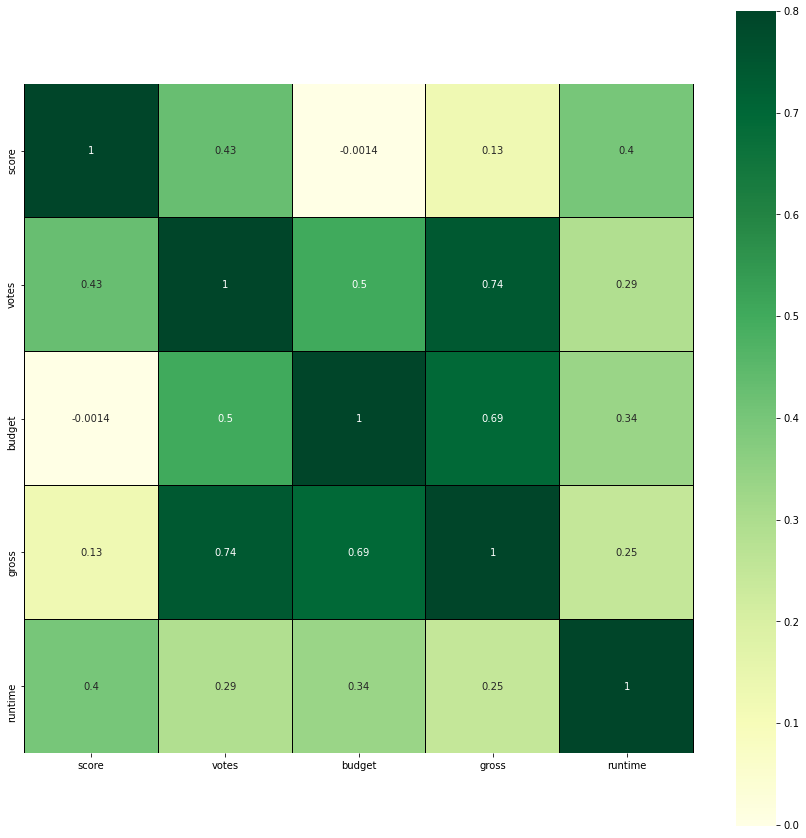

In [21]:
# HeatMaps: are a type of plot which is necessary to find the dependent variables. 
# One of the best ways to find the relationship between the features can be done using heat maps

corr=movies_df.corr(method='spearman')
plt.figure(figsize=(15,15))
sn.heatmap(corr,vmax=.8,linewidths=0.01,square=True,annot=True,cmap='YlGn',linecolor='black')

# Below, positive correlation is represented by dark shades and negative correlation by lighter shades.
# shows if one variable influenced by other variable

# Votes influences revenue the most with a positive correlation of .74
# Budget influences revenue the with a positive correlation of .69

In [22]:
# Numerical Representation of the Correlations
corr = movies_df.corr()
corr

,score,votes,budget,gross,runtime
score,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.399451,0.309212,0.320447,0.245216,1.000000


<AxesSubplot:xlabel='budget', ylabel='gross'>

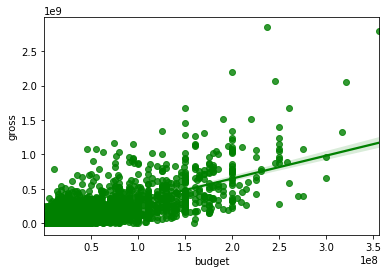

In [23]:
# plots between independent variable - runtime  and target variable - gross
sn.regplot(x=movies_df.budget, y=movies_df.gross, color='g')

<AxesSubplot:xlabel='runtime', ylabel='gross'>

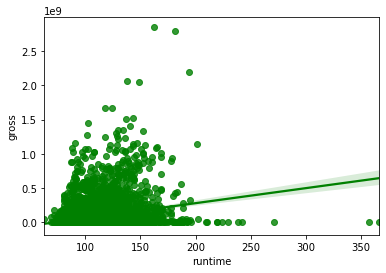

In [24]:
# plots between independent variable - runtime  and target variable - gross
sn.regplot(x=movies_df.runtime, y=movies_df.gross, color='g')

### Need a comment here on the correlation analysis


In [25]:
## Analysis of numeric variables

## Function for finding outliers

def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)  

def plotchart(col):
    fix, (ax1,ax2) =plt.subplots(1,2,figsize=(7,5))
    sn.boxplot(col, orient='v',ax=ax1)
    ax1.set_ylabel=col.name
    ax1.set_title('Box plot of {}'.format(col.name))
    sn.distplot(col,ax=ax2) 
    ax2.set_title('Distribution plot of {}'.format(col.name))
    
def analysis_column(col):
    print('count of outliers ', len(findoutliers(col)))
    print('Mean ',format(col.mean()))
    print('Median ',format(col.median()))
    print('Missing values',format(col.isnull().sum()))
    print('% of Missing values',format(round(100*(col.isnull().sum()/len(col)),2)))
    
    plotchart(col)

Revenue Analysis

In [26]:
# Analysis on Revenue
# we know Q3 AND Q1 AND IQR=Q3-Q1, any data point which is less than Q1-1.5IQR or Q3+1.5IQR are consider as outlier
# There seem to be outliers at the upper end of the Gross Revenue

Q1=movies_df.gross.quantile(.25)
Q3=movies_df.gross.quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print("Min Value",movies_df.gross.min())
print("Max Value ",movies_df.gross.max())
print("Q1 ",Q1)
print("Q3 ",Q3)
print("IQR ",IQR)
print('lower_limit',lower_limit)
print('upper_limit',upper_limit)

Min Value 309.0
Max Value  2847246203.0
Q1  4532055.5
Q3  76016691.5
IQR  71484636.0
lower_limit -102694898.5
upper_limit 183243645.5


count of outliers  851
Mean  78500541.01778312
Median  20205757.0
Missing values 189
% of Missing values 2.46


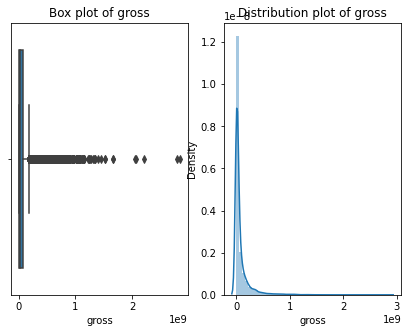

In [27]:
# Revenue Analysis and Individual metric to look for outliers and distribution of data
analysis_column(movies_df.gross)

<AxesSubplot:>

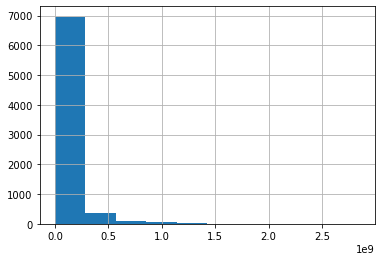

In [28]:
# Gross Histogram — refers to the frequency of occurrence of variables in an interval.
movies_df.gross.hist()

Text(0, 0.5, 'Number of Movies')

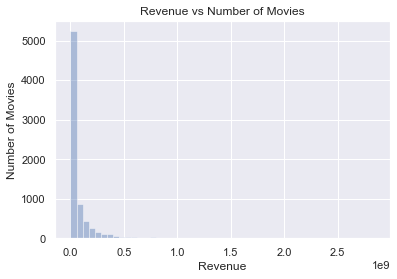

In [69]:
# Revenue vs # of Movies
ax_revenue = sn.distplot(movies_df.gross,kde=False)
ax_revenue.set_title('Revenue vs Number of Movies')
ax_revenue.set_xlabel('Revenue')
ax_revenue.set_ylabel('Number of Movies')
#plt.savefig("revenue_vs_number_of_movies.png")

Budget Analysis

In [30]:
# Analysis on Budget
# we know Q3 AND Q1 AND IQR=Q3-Q1, any data point which is less than Q1-1.5IQR or Q3+1.5IQR are consider as outlier
# There seem to be outliers at the upper end of the budget

Q1=movies_df.budget.quantile(.25)
Q3=movies_df.budget.quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print("Min Value",movies_df.budget.min())
print("Max Value ",movies_df.budget.max())
print("Q1 ",Q1)
print("Q3 ",Q3)
print("IQR ",IQR)
print('lower_limit',lower_limit)
print('upper_limit',upper_limit)

Min Value 3000.0
Max Value  356000000.0
Q1  10000000.0
Q3  45000000.0
IQR  35000000.0
lower_limit -42500000.0
upper_limit 97500000.0


count of outliers  445
Mean  35589876.192650534
Median  20500000.0
Missing values 2171
% of Missing values 28.31


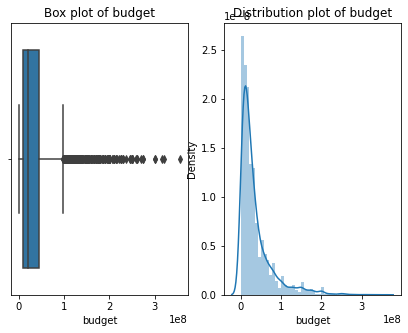

In [31]:
# Budget Analysis and Individual metric to look for outliers and distribution of data
analysis_column(movies_df.budget)

<AxesSubplot:>

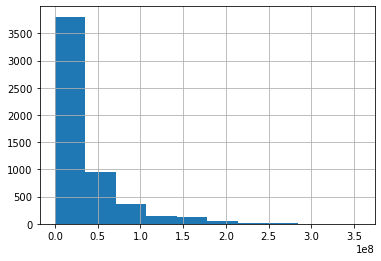

In [32]:
movies_df.budget.hist()
# Histogram — refers to the frequency of occurrence of variables in an interval.

Runtime Analysis

In [33]:
# Analysis on Runtime
# we know Q3 AND Q1 AND IQR=Q3-Q1, any data point which is less than Q1-1.5IQR or Q3+1.5IQR are consider as outlier

Q1=movies_df.runtime.quantile(.25)
Q3=movies_df.runtime.quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print("Min Value",movies_df.runtime.min())
print("Max Value ",movies_df.runtime.max())
print("Q1 ",Q1)
print("Q3 ",Q3)
print("IQR ",IQR)
print('lower_limit',lower_limit)
print('upper_limit',upper_limit)

Min Value 55.0
Max Value  366.0
Q1  95.0
Q3  116.0
IQR  21.0
lower_limit 63.5
upper_limit 147.5


count of outliers  240
Mean  107.2616127348643
Median  104.0
Missing values 4
% of Missing values 0.05


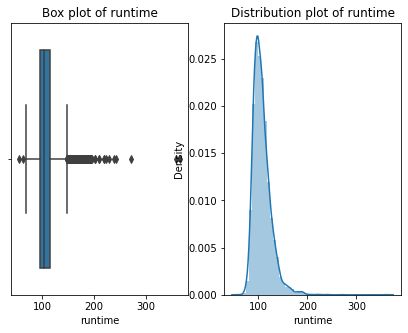

In [34]:
# Analysis and Individual metric to look for outliers and distribution of data
analysis_column(movies_df.runtime)

<AxesSubplot:>

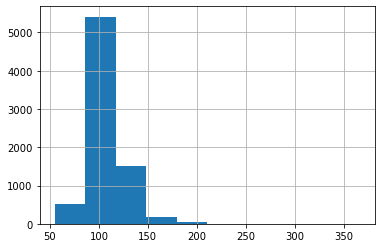

In [35]:
# Runtime Histogram — refers to the frequency of occurrence of variables in an interval.
movies_df.runtime.hist()

In [36]:
# Analysis on Votes
# we know Q3 AND Q1 AND IQR=Q3-Q1, any data point which is less than Q1-1.5IQR or Q3+1.5IQR are consider as outlier

Q1=movies_df.votes.quantile(.25)
Q3=movies_df.votes.quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print("Min Value",movies_df.votes.min())
print("Max Value ",movies_df.votes.max())
print("Q1 ",Q1)
print("Q3 ",Q3)
print("IQR ",IQR)
print('lower_limit',lower_limit)
print('upper_limit',upper_limit)

Min Value 7.0
Max Value  2400000.0
Q1  9100.0
Q3  93000.0
IQR  83900.0
lower_limit -116750.0
upper_limit 218850.0


count of outliers  803
Mean  88108.50476190477
Median  33000.0
Missing values 3
% of Missing values 0.04


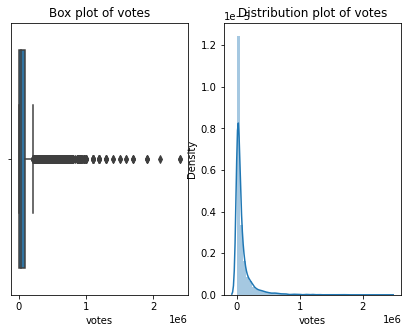

In [37]:
# Analysis and Individual metric to look for outliers and distribution of data
analysis_column(movies_df.votes)

In [38]:
# Analysis on Score
# we know Q3 AND Q1 AND IQR=Q3-Q1, any data point which is less than Q1-1.5IQR or Q3+1.5IQR are consider as outlier

Q1=movies_df.score.quantile(.25)
Q3=movies_df.score.quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print("Min Value",movies_df.score.min())
print("Max Value ",movies_df.score.max())
print("Q1 ",Q1)
print("Q3 ",Q3)
print("IQR ",IQR)
print('lower_limit',lower_limit)
print('upper_limit',upper_limit)

Min Value 1.9
Max Value  9.3
Q1  5.8
Q3  7.1
IQR  1.2999999999999998
lower_limit 3.85
upper_limit 9.049999999999999


In [39]:
print(len(findoutliers(movies_df.score))) # of rows having outlier

119


count of outliers  119
Mean  6.390410958904098
Median  6.5
Missing values 3
% of Missing values 0.04


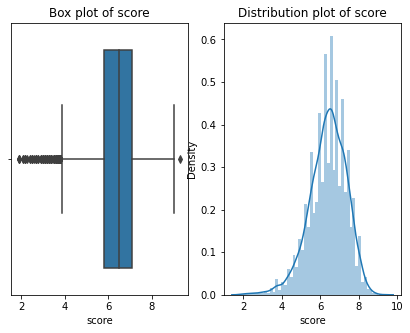

In [40]:
# Analysis and Individual metric to look for outliers and distribution of data
analysis_column(movies_df.score)

### Histogram  Visualizations

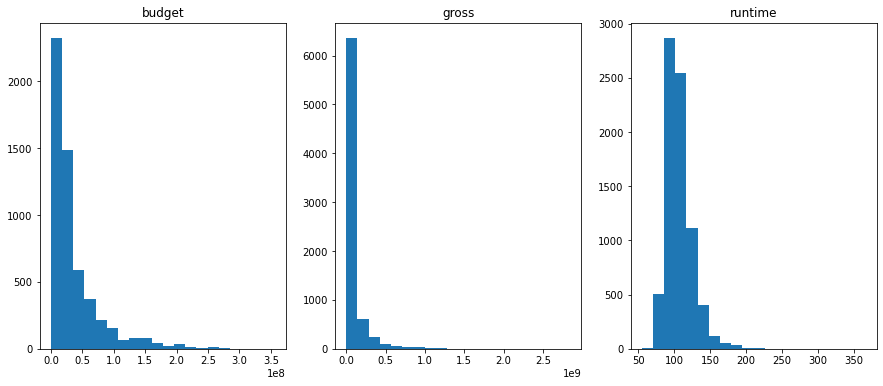

In [41]:
# Using Histograms to to check for outliers in numerical columns
bins = len(movies_df)
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.hist(movies_df.budget, bins=20)
plt.title('budget')

plt.subplot(1, 3, 2)
plt.hist(movies_df.gross, bins=20)
plt.title('gross')

plt.subplot(1, 3, 3)
plt.hist(movies_df.runtime, bins=20)
plt.title('runtime')


plt.show()


Most Movies had a budget below 100M Budgets, Revenue below 200M and a Runtime between 75 and 160 min
Should movies with extreme outliers in one of these categories be dropped?
Leaving in for now...


## Categorical Analysis

In [42]:
movies_df.star.value_counts()

Nicolas Cage           43
Tom Hanks              41
Robert De Niro         41
Denzel Washington      37
Bruce Willis           34
                       ..
Mikhail Baryshnikov     1
Eili Harboe             1
Andy Kaufman            1
George Newbern          1
Alexandre Rodrigues     1
Name: star, Length: 2814, dtype: int64

In [43]:
# in percentage
movies_df.star.value_counts(normalize=True)
# that Nicolas Cage is .56% 

Nicolas Cage           0.005608
Tom Hanks              0.005348
Robert De Niro         0.005348
Denzel Washington      0.004826
Bruce Willis           0.004435
                         ...   
Mikhail Baryshnikov    0.000130
Eili Harboe            0.000130
Andy Kaufman           0.000130
George Newbern         0.000130
Alexandre Rodrigues    0.000130
Name: star, Length: 2814, dtype: float64

In [44]:
# Bar plot for Star Category  - #too many to see something usefull here
# sn.factorplot('star',data=movies_df,kind='count') 

In [45]:
movies_df.director.value_counts()

Woody Allen         38
Clint Eastwood      31
Directors           28
Steven Spielberg    27
Ron Howard          24
                    ..
Madonna              1
Barry Primus         1
Josh Schwartz        1
Mark Piznarski       1
Andy Serkis          1
Name: director, Length: 2949, dtype: int64

In [46]:
# in percentage
movies_df.director.value_counts(normalize=True)


Woody Allen         0.004956
Clint Eastwood      0.004043
Directors           0.003652
Steven Spielberg    0.003521
Ron Howard          0.003130
                      ...   
Madonna             0.000130
Barry Primus        0.000130
Josh Schwartz       0.000130
Mark Piznarski      0.000130
Andy Serkis         0.000130
Name: director, Length: 2949, dtype: float64

In [47]:
# Bar plot for Director Category  - #too many to see something usefull here
# sn.factorplot('director',data=movies_df,kind='count') 

In [48]:
movies_df.writer.value_counts()

Woody Allen            37
Stephen King           31
Luc Besson             26
John Hughes            25
William Shakespeare    15
                       ..
Ruth Avergon            1
Michael Cunningham      1
Rex Burns               1
Denis O'Neill           1
Sarah Adina Smith       1
Name: writer, Length: 4535, dtype: int64

#### for actors / directors  should we groups the low volumes together?

In [49]:
# in percentage
movies_df.writer.value_counts(normalize=True)

Woody Allen            0.004827
Stephen King           0.004044
Luc Besson             0.003392
John Hughes            0.003262
William Shakespeare    0.001957
                         ...   
Ruth Avergon           0.000130
Michael Cunningham     0.000130
Rex Burns              0.000130
Denis O'Neill          0.000130
Sarah Adina Smith      0.000130
Name: writer, Length: 4535, dtype: float64

In [50]:
movies_df.company.value_counts()

Universal Pictures            377
Warner Bros.                  334
Columbia Pictures             332
Paramount Pictures            320
Twentieth Century Fox         240
                             ... 
Cloud Ten Pictures              1
Filmkameratene A/S              1
Crescent Drive Pictures         1
Freddie Fields Productions      1
Kyta Productions                1
Name: company, Length: 2385, dtype: int64

In [51]:
# in percentage
movies_df.company.value_counts(normalize=True)

Universal Pictures            0.049275
Warner Bros.                  0.043654
Columbia Pictures             0.043393
Paramount Pictures            0.041825
Twentieth Century Fox         0.031368
                                ...   
Cloud Ten Pictures            0.000131
Filmkameratene A/S            0.000131
Crescent Drive Pictures       0.000131
Freddie Fields Productions    0.000131
Kyta Productions              0.000131
Name: company, Length: 2385, dtype: float64

In [52]:
# sn.factorplot('company',data=movies_df,kind='count')  # not very helpful

In [53]:
# Count the number of movies per year  --- looks like 200 is the cap
movies_df.year.value_counts()

2000    200
2009    200
2002    200
2003    200
2004    200
2005    200
2006    200
2007    200
2008    200
2010    200
2019    200
2011    200
2012    200
2013    200
2014    200
2015    200
2016    200
2017    200
2001    200
1999    200
1990    200
1991    200
1985    200
1986    200
1987    200
1988    200
1989    200
1998    200
2018    200
1992    200
1993    200
1994    200
1995    200
1996    200
1997    200
1984    168
1983    144
1982    126
1981    113
1980     92
2020     25
Name: year, dtype: int64

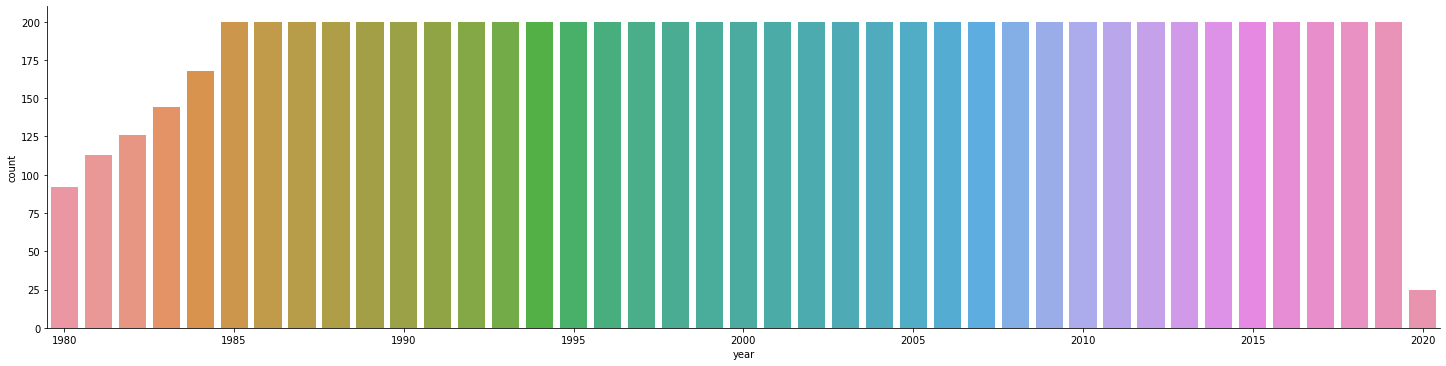

In [54]:
#Plot the numbers of movies released per year

pl = sn.factorplot('year',data=movies_df, aspect=4,kind='count')
pl.set_xticklabels(step=5)

Text(0.5, 1.0, 'Average Revenue vs. Year of release')

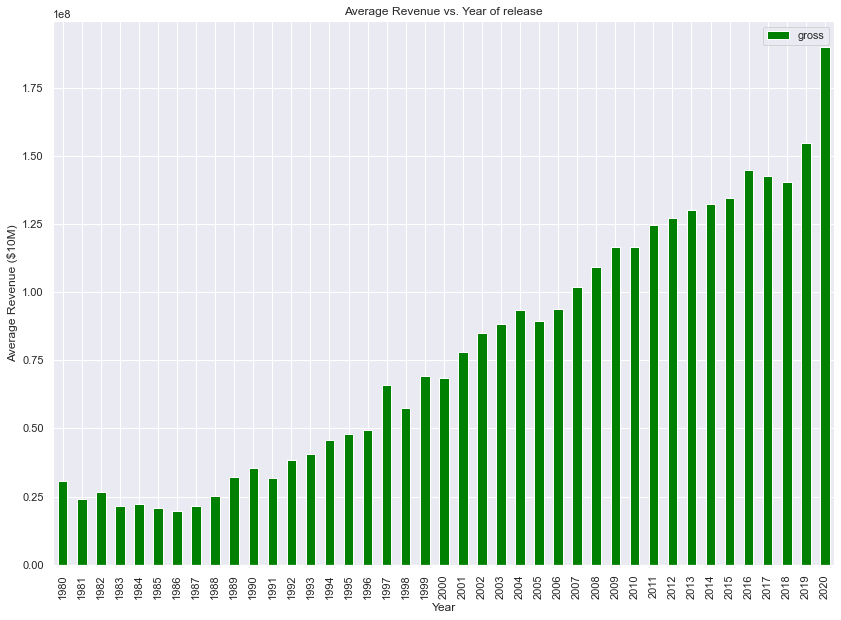

In [68]:
#Revenue compared to release date

mean_year = movies_df.groupby('year').mean().reset_index()
sn.set()
mean_year.plot.bar(x='year', y='gross', color='green', figsize=(14, 10))
plt.xlabel('Year')
plt.ylabel('Average Revenue ($10M)')
plt.title('Average Revenue vs. Year of release')


The Graph is showing a increase in movies revenue from 1980 to 2020.  
What is causing this?  More Movie theaters? Increase in Rate? More people going to moves?


In [56]:
movies_df["genre"].unique()

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Family', 'Sci-Fi', 'Animation', 'Romance',
       'Music', 'Western', 'Thriller', 'History', 'Mystery', 'Sport',
       'Musical'], dtype=object)

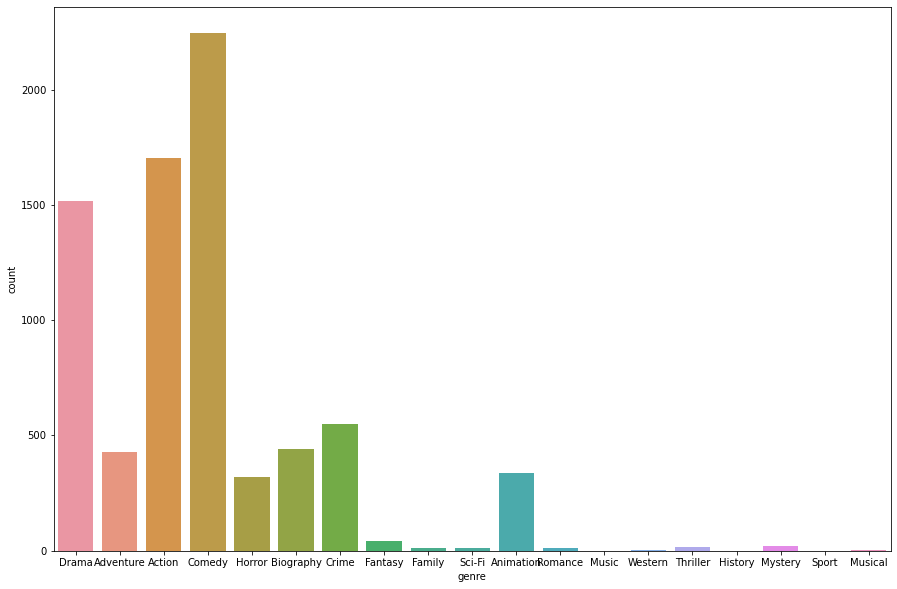

In [67]:
plt.figure(figsize=(15,10))
sn.countplot(x = movies_df["genre"])
plt.show()


19 unique Genre, 
Comedies having the larges number of movies in the dataset, followed by Action and then Drama
These 3 make up more than 50% of all the movies in the dataset


# Data Relationships

In [ ]:
# look at relationships between Categories and Revenue
movies_df_strings = movies_df.loc[:, ['company', 'country', 'director', 'genre', 'name', 'rating', 'star', 'writer']]
catgs = {}
for i in list(movies_df_strings.columns):
    catgs[i] = movies_df_strings[i].nunique()
    
catgs

Some Categories have too many values to bar plot - company, director, name, star and writer

Text(0.5, 1.0, 'Average Revenue vs. Country of Release')

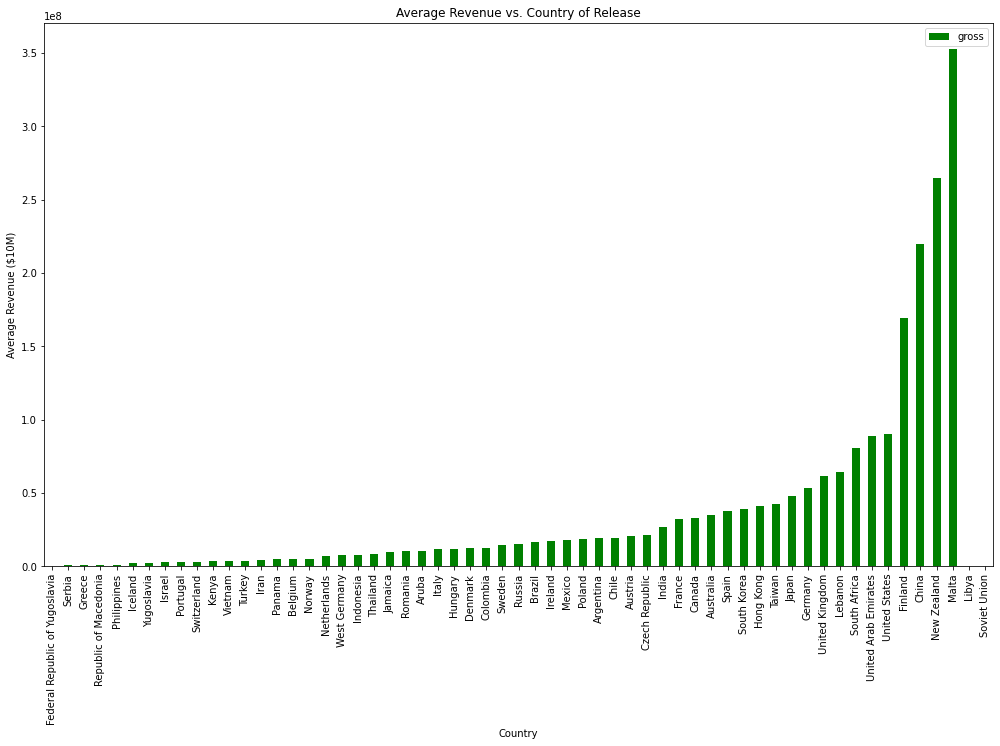

In [58]:
# Average Revenue vs Country of Release
movies_df.groupby('country').mean().reset_index().sort_values('gross').plot.bar(x='country', y='gross', figsize=(17,10), color='g')
plt.xlabel('Country')
plt.ylabel('Average Revenue ($10M)')
plt.title('Average Revenue vs. Country of Release')

Finland, China, New Zealand adn Malta have the Highest average revenue per release

Text(0.5, 1.0, 'Average Revenue vs. Genre')

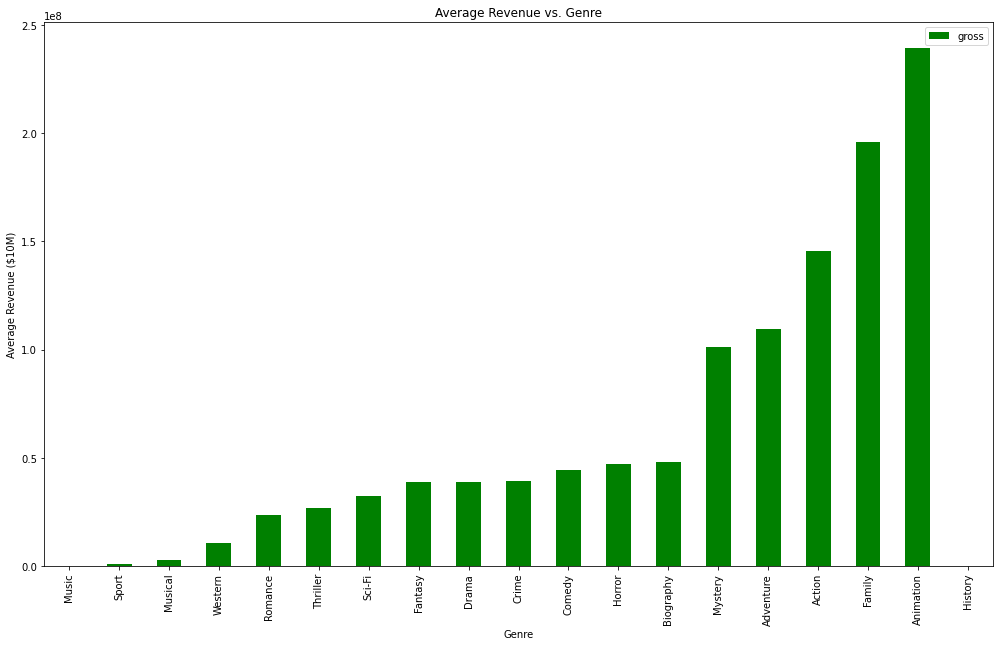

In [59]:
# Average Revenue vs Country of Release
movies_df.groupby('genre').mean().reset_index().sort_values('gross').plot.bar(x='genre', y='gross', figsize=(17,10), color='g')
plt.xlabel('Genre')
plt.ylabel('Average Revenue ($10M)')
plt.title('Average Revenue vs. Genre')


Animation has the highest average among the different Genre, followed by Family and Action.  


Text(0.5, 1.0, 'Revenue vs. Genre of Movie')

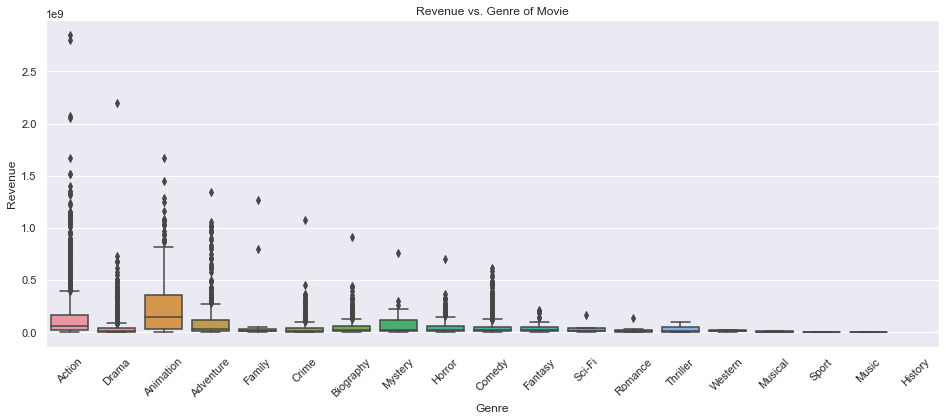

In [70]:
# Genre of movies and Revenue - Box Plot
plt.figure(figsize=(16, 6))
sn.boxplot(x='genre', y='gross', data=movies_df.sort_values('gross', ascending=False))
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.title('Revenue vs. Genre of Movie')

Text(0.5, 1.0, 'Budget vs. Revenue')

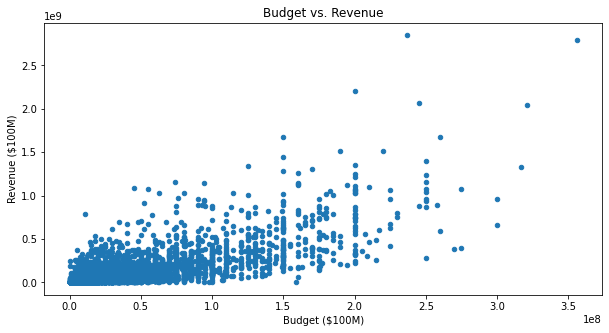

In [61]:
# Scatter PLot - Revenue vs Budget

movies_df.plot.scatter(x='budget', y='gross', figsize=(10, 5))
plt.xlabel('Budget ($100M)')
plt.ylabel('Revenue ($100M)')
plt.title('Budget vs. Revenue')


This shows a somewhat linear relationship between gross revenue and budget which is not suprise.  
One could assume the more you spend to make a movie the more revenue it might make.


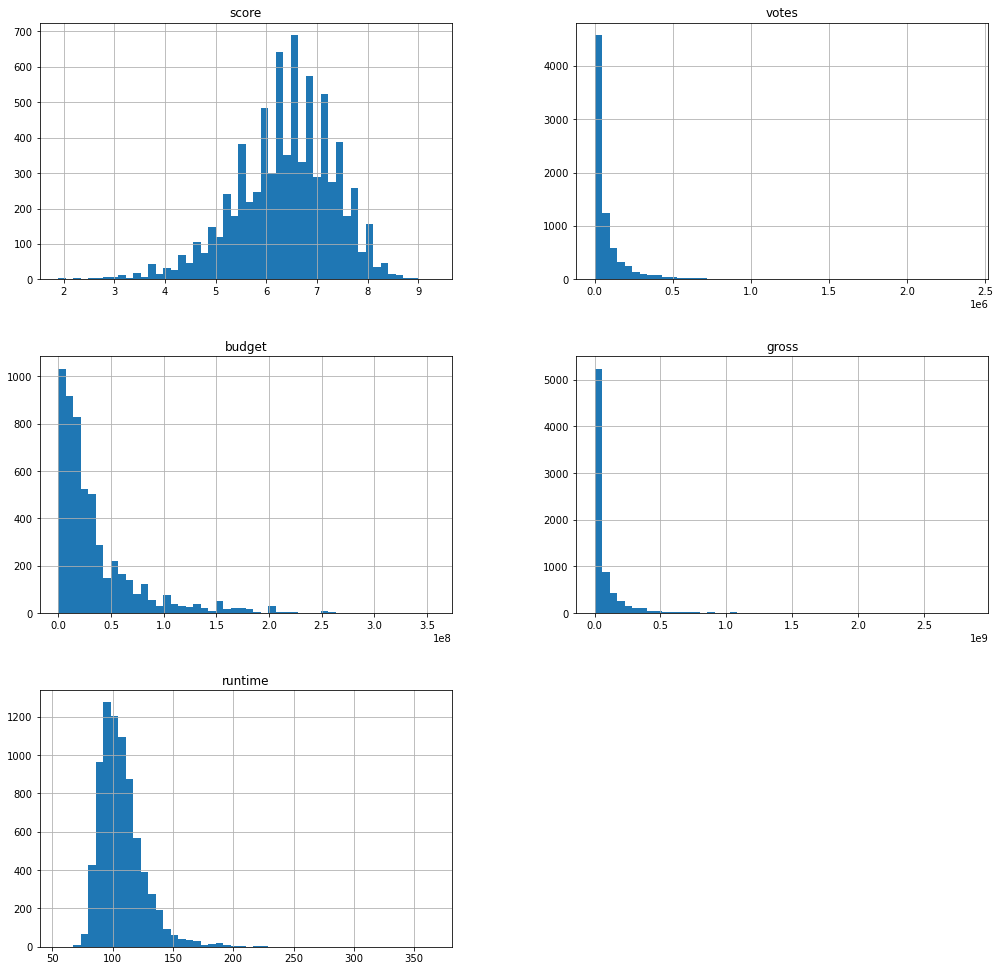

In [62]:
# Distribution Histogram
movies_df.hist(bins=50,figsize=(17,17))
plt.show()

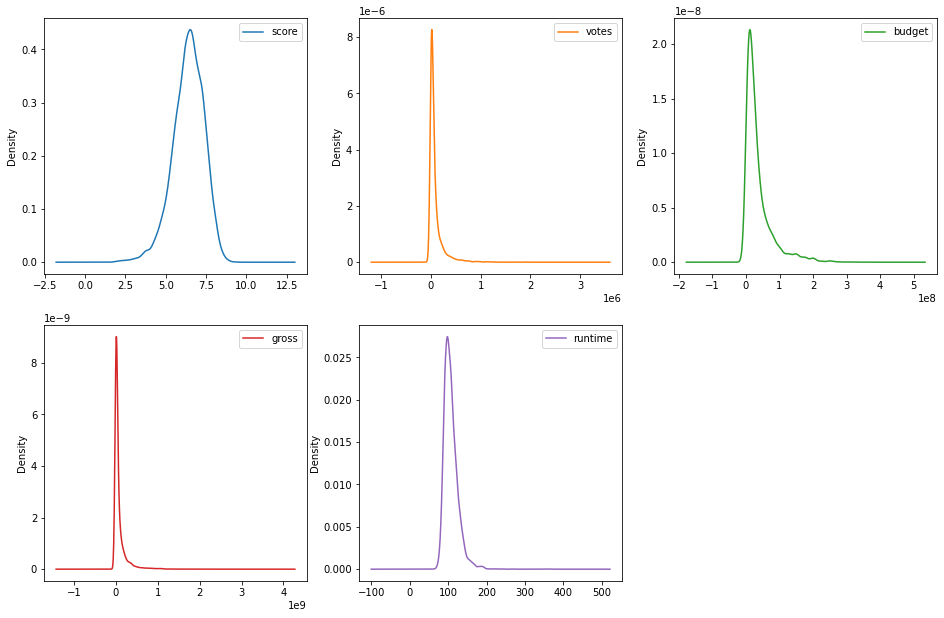

In [63]:
# Distibution - Density
movies_df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, sharey=False,fontsize=10, figsize = (16, 16))
plt.show()


Most Variables seem to be right skewed or positive in relation to our target variable of Gross Revenue
Score seems to be normally distributed


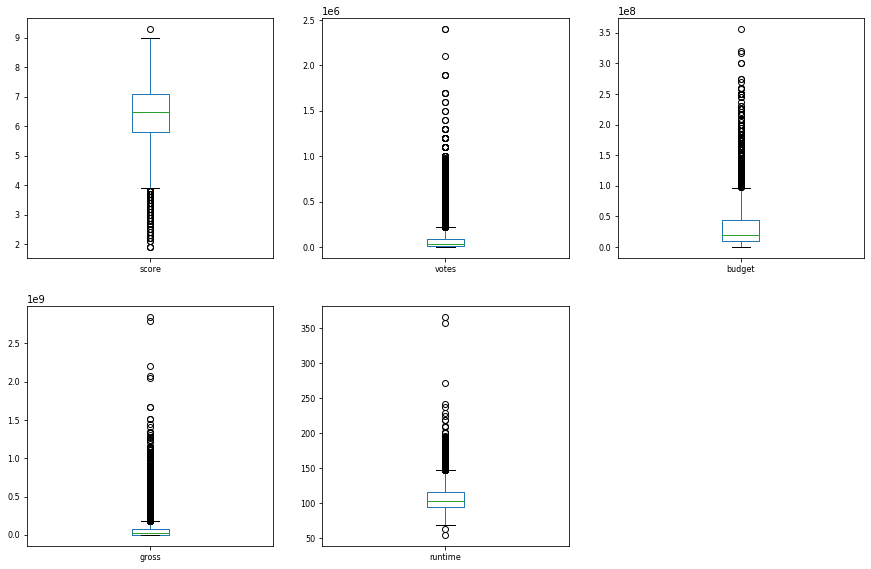

In [64]:
# Box Plot
movies_df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False,fontsize=8, figsize = (15, 15))
plt.show()

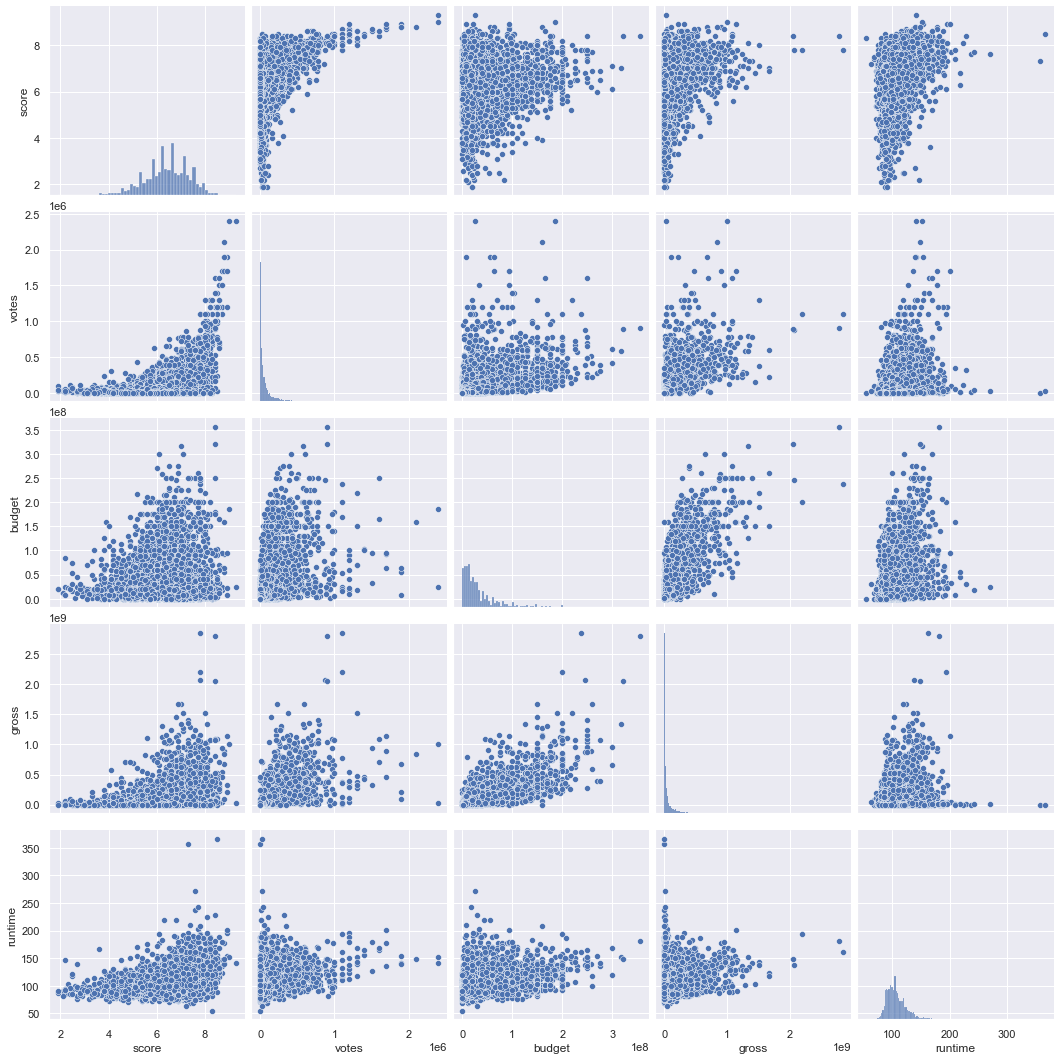

In [71]:
# Scatter Matrix
sn.pairplot(movies_df,height=3) # scatter matrix
plt.show()

Looks to be outliers in all features. 

Text(0, 0.5, 'Budget')

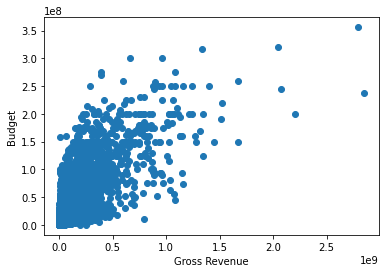

In [66]:
# SCatter of just Gross vs Budget
plt.scatter(movies_df["gross"],movies_df["budget"])
plt.xlabel("Gross Revenue")
plt.ylabel("Budget")